In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("uber.csv")

In [3]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [6]:
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])

<Axes: >

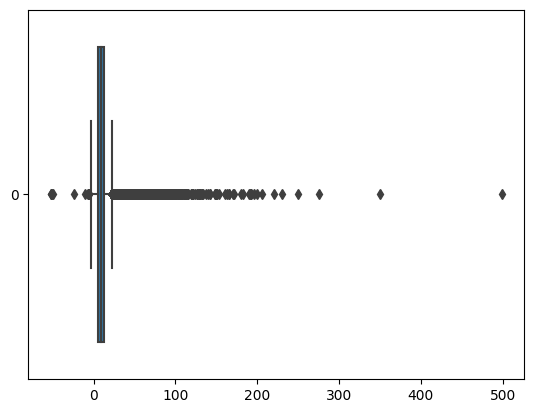

In [7]:
sns.boxplot(df["fare_amount"],orient='h')

In [8]:
lb=df["fare_amount"].quantile(0.01)
ub=df["fare_amount"].quantile(0.99)

df=df[(df["fare_amount"]> lb) & (df['fare_amount']<ub)]


In [9]:
x=df.drop("fare_amount",axis=1)
y=df["fare_amount"]

In [10]:
x["pickup_datetime"]=pd.to_numeric(pd.to_datetime(x["pickup_datetime"]))
x=x.loc[:,x.columns.str.contains("^Unnamed")]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred=lr.predict(x_test)

In [14]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_pred,y_test))
rmse

7.976267684825578

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
rf=RandomForestRegressor(n_estimators=50,random_state=45)
rf.fit(x_train,y_train)


RandomForestRegressor(n_estimators=50, random_state=45)

In [17]:
y_pred2=rf.predict(x_test)


In [18]:
rmse2=np.sqrt(mean_squared_error(y_pred2,y_test))
rmse2

9.7394956177901